In [16]:
import importlib
from library import data_preprocess as dp
import matplotlib.pyplot as plt
importlib.reload(dp)
import pickle

In [17]:
file_path1 = "./data/shortjokes.csv"
file_path2 = "./data/crowdtruth_humorous_oneliners.pickle"

In [18]:
#file_path1 = dp.download_data('https://github.com/amoudgl/short-jokes-dataset/raw/master/shortjokes.csv')

In [24]:
jokes1 = dp.load_data(file_path1, header=True, sep=',')
jokes1 = list(jokes1['Joke'].values)
with open(file_path2, 'rb') as pickleFile:
    jokes2 = pickle.load(pickleFile)
jokes = jokes1
jokes.extend(jokes2)
print(jokes2[:2])
print(jokes[:10])

['Insanity is hereditary, - You get it from your children.', 'An honest politician is one who, when bought, stays bought.']
['[me narrating a documentary about narrators] "I can\'t hear what they\'re saying cuz I\'m talking"', 'Telling my daughter garlic is good for you. Good immune system and keeps pests away.Ticks, mosquitos, vampires... men.', "I've been going through a really rough period at work this week It's my own fault for swapping my tampax for sand paper.", 'If I could have dinner with anyone, dead or alive... ...I would choose alive. -B.J. Novak-', 'Two guys walk into a bar. The third guy ducks.', "Why can't Barbie get pregnant? Because Ken comes in a different box. Heyooooooo", 'Why was the musician arrested? He got in treble.', 'Did you hear about the guy who blew his entire lottery winnings on a limousine? He had nothing left to chauffeur it.', "What do you do if a bird shits on your car? Don't ask her out again.", 'He was a real gentlemen and always opened the fridge do

In [25]:
unique_chars = dp.get_unique_chars(jokes)
print(len(unique_chars))
print(unique_chars)

97
['\x08', '\x10', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']


In [26]:
dp.get_char_presence(jokes)

Number of sentences containing each char is,
{'\x08': 1, '\x10': 1, ' ': 236843, '!': 27659, '"': 32687, '#': 725, '$': 1400, '%': 1164, '&': 3672, "'": 105958, '(': 4659, ')': 5136, '*': 8101, '+': 294, ',': 66856, '-': 20385, '.': 170322, '/': 3290, '0': 9605, '1': 11289, '2': 8906, '3': 5778, '4': 4286, '5': 5427, '6': 3441, '7': 2854, '8': 2987, '9': 4059, ':': 23188, ';': 2043, '<': 52, '=': 411, '>': 42, '?': 109393, '@': 140, 'A': 52504, 'B': 34835, 'C': 27523, 'D': 30529, 'E': 18124, 'F': 17389, 'G': 17807, 'H': 44100, 'I': 103414, 'J': 14597, 'K': 9620, 'L': 15430, 'M': 39107, 'N': 24313, 'O': 20770, 'P': 21072, 'Q': 3684, 'R': 16879, 'S': 43037, 'T': 58894, 'U': 8545, 'V': 5441, 'W': 93356, 'X': 926, 'Y': 19730, 'Z': 1051, '[': 5614, '\\': 81, ']': 5615, '^': 402, '_': 388, '`': 63, 'a': 233695, 'b': 149403, 'c': 185169, 'd': 213402, 'e': 235143, 'f': 155401, 'g': 170851, 'h': 225427, 'i': 229643, 'j': 33305, 'k': 139910, 'l': 208224, 'm': 180659, 'n': 228412, 'o': 233405, 'p

In [27]:
print("Total number of jokes = ", len(jokes))
filter_jokes = dp.filter_data(jokes, "^[a-zA-Z !\"',.?\-\:\*]+$")
print(len(filter_jokes))
print(filter_jokes[:10])

Total number of jokes =  236875
194664
['Telling my daughter garlic is good for you. Good immune system and keeps pests away.Ticks, mosquitos, vampires... men.', "I've been going through a really rough period at work this week It's my own fault for swapping my tampax for sand paper.", 'If I could have dinner with anyone, dead or alive... ...I would choose alive. -B.J. Novak-', 'Two guys walk into a bar. The third guy ducks.', "Why can't Barbie get pregnant? Because Ken comes in a different box. Heyooooooo", 'Why was the musician arrested? He got in treble.', 'Did you hear about the guy who blew his entire lottery winnings on a limousine? He had nothing left to chauffeur it.', "What do you do if a bird shits on your car? Don't ask her out again.", 'He was a real gentlemen and always opened the fridge door for me', 'Telling my daugthers date that "she has lice and its very contagious the closer you get to her." *Correct way to parent.']


In [28]:
special_chars = [' ', '!', '"', "'", '*', ',', '-', '.', ':', '?']
clean_jokes = dp.clean_data(jokes, "^[a-zA-Z !\"'*,\-.:?]+$", special_chars)

unique_chars = dp.get_unique_chars(clean_jokes)
print(len(unique_chars))
print(unique_chars)

clean_jokes = dp.tokenize(clean_jokes)

print(len(clean_jokes))
print(clean_jokes[:2])

# stats of number of tokens in the sentence
dp.get_len_stats(clean_jokes)

36
[' ', '!', '"', "'", '*', ',', '-', '.', ':', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
194664
[['telling', 'my', 'daughter', 'garlic', 'is', 'good', 'for', 'you', '.', 'good', 'immune', 'system', 'and', 'keeps', 'pests', 'away', '.', 'ticks', ',', 'mosquitos', ',', 'vampires', 'threedots', 'men', '.'], ['i', "'", 've', 'been', 'going', 'through', 'a', 'really', 'rough', 'period', 'at', 'work', 'this', 'week', 'it', "'", 's', 'my', 'own', 'fault', 'for', 'swapping', 'my', 'tampax', 'for', 'sand', 'paper', '.']]
min of length:  1
max of length:  107
average length:  21.00698126001726
mode of length:  16


In [29]:
MIN_NUM_TOKENS = 6
MAX_NUM_TOKENS = 40
clean_jokes = dp.filter_data_on_length(clean_jokes, MIN_NUM_TOKENS, MAX_NUM_TOKENS)
print(len(clean_jokes))

188010


In [30]:
word_freqs = dp.get_vocabulary(clean_jokes)

In [31]:
dp.get_vocabulary_stats(word_freqs)

Total vocabulary:  54014
average of frequency:  70.7810197356241
mode of frequency:  1


In [38]:
filtered_words = dp.filter_words(word_freqs, 20)
print("Number of filtered words = ", len(filtered_words))
sents = dp.get_sentences_with_words(clean_jokes, filtered_words)
print(len(sents))
print(sents[:5])

Number of filtered words =  8212
94663
[['two', 'guys', 'walk', 'into', 'a', 'bar', '.', 'the', 'third', 'guy', 'ducks', '.'], ['what', 'do', 'you', 'do', 'if', 'a', 'bird', 'shits', 'on', 'your', 'car', '?', 'don', "'", 't', 'ask', 'her', 'out', 'again', '.'], ['he', 'was', 'a', 'real', 'gentlemen', 'and', 'always', 'opened', 'the', 'fridge', 'door', 'for', 'me'], ['you', 'ever', 'notice', 'that', 'the', 'most', 'dangerous', 'thing', 'about', 'marijuana', 'is', 'getting', 'caught', 'with', 'it', '?'], ['my', 'wife', 'is', 'in', 'a', 'bad', 'mood', '.', 'i', 'think', 'her', 'boyfriend', 'forgot', 'their', 'anniversary', '.', 'way', 'to', 'go', ',', 'dude', '.', 'now', 'we', 'all', 'suffer', 'threedots']]


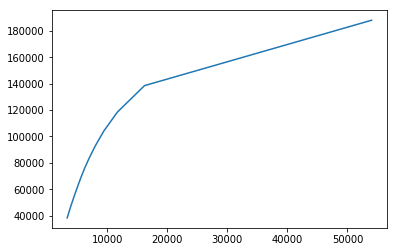

In [41]:
# Analysis for choosing optimum word freq cut off
freqsL = list(range(1, 80, 5))
num_words = []
num_sents = []
for x in freqsL:
    filtered_words = dp.filter_words(word_freqs, x)
    num_words.append(len(filtered_words))
    num_sents.append(len(dp.get_sentences_with_words(clean_jokes, filtered_words)))
plt.plot(num_words, num_sents)
plt.show()

In [42]:
# Considering only words which have a frequency of atleast 15 and the corresponding sentences
final_vocabulary = dp.filter_words(word_freqs, 15)
print("Number of filtered words = ", len(final_vocabulary))
final_clean_jokes = dp.get_sentences_with_words(clean_jokes, final_vocabulary)
print("Number of sentences: ", len(final_clean_jokes))

Number of filtered words =  9764
Number of sentences:  106416


In [43]:
# Let's append sos and eos tokens to all sentences
clean_jokes_final = [["sos"] + tokens + ["eos"] for tokens in final_clean_jokes]
clean_jokes_final = [' '.join(tokens) for tokens in clean_jokes_final]
vocabulary_final = final_vocabulary.extend(["sos", "eos"])
print("Final vocabulary size: ", len(final_vocabulary))
print("Number of sentences: ", len(clean_jokes_final))
print(clean_jokes_final[:2])

Final vocabulary size:  9766
Number of sentences:  106416
['sos two guys walk into a bar . the third guy ducks . eos', 'sos why was the musician arrested ? he got in treble . eos']


In [44]:
with open("./datasets/jokes.pickle","wb") as fop:
    pickle.dump(clean_jokes_final, fop)
    
with open("./datasets/vocabulary.pickle","wb") as fop:
    pickle.dump(clean_jokes_final, fop)

In [45]:
print(clean_jokes_final[:5])

['sos two guys walk into a bar . the third guy ducks . eos', 'sos why was the musician arrested ? he got in treble . eos', "sos what do you do if a bird shits on your car ? don ' t ask her out again . eos", 'sos he was a real gentlemen and always opened the fridge door for me eos', 'sos you ever notice that the most dangerous thing about marijuana is getting caught with it ? eos']
